# MNIST

## MNISTデータをフェッチ

In [1]:
# 本来はこれで取れるが、なぜか「Internal Server Eroor」になるので、次の方法で代替する
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# mnist

In [1]:
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except Exception as ex:        
    from six.moves import urllib
    from scipy.io import loadmat
    import os

    mnist_path = os.path.join(".", "datasets", "mnist-original.mat")

    # download dataset from github.
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)

    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Done!")
    
# Source : https://stackoverflow.com/questions/43149272/cannot-get-mnist-database-through-anaconda-jupyter

Done!


In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape #教師データ、70000のデータで、１つのデータの特徴量は784(28*28)

(70000, 784)

In [4]:
X[123] # 適当に１つのデータを見て見る
# 0（白）~255(黒)のピクセルの明度が入っていることがわかる

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  94,
       109, 191, 255, 222,  41,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       218, 247, 252, 252, 253, 200,  21,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
y.shape #正解ラベル

(70000,)

In [6]:
import numpy as np
print(np.where(y == 0)) #適当に「0」の位置を確認
print(np.where(y == 5))
print(np.where(y == 9))
# 0~9までのデータが順番に格納されていることがわかる

print(y[59990:60000])
print(y[60000:60010])
# さらに0~60000番目までは教師データ、60001~70000番目まではテストデータという具合に分けられていることがわかる

(array([    0,     1,     2, ..., 60977, 60978, 60979]),)
(array([30596, 30597, 30598, ..., 66028, 66029, 66030]),)
(array([54051, 54052, 54053, ..., 69997, 69998, 69999]),)
[ 9.  9.  9.  9.  9.  9.  9.  9.  9.  9.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## データから数字を描画してみる

(784,)
5.0
(28, 28)


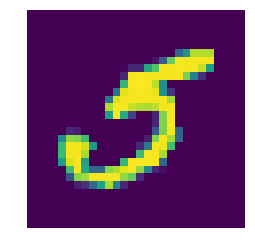

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000] # 36000番目のデータ見てみる
print(some_digit.shape)
print(y[36000])
some_digit_image = some_digit.reshape(28, 28)
print(some_digit_image.shape)
plt.imshow(some_digit_image)
# plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

plt.show()

## 訓練セットとテストセットに分ける

In [10]:
# それぞれを変数に格納
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]
print(len(X_train), len(X_test), len(y_train), len(y_test))

60000 10000 60000 10000


In [11]:
# 訓練セットをシャッフルしておく
shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

## 二項分類器の訓練 (5かどうかを見分ける判別器)

In [12]:
y_train_5 = (y_train == 5) #各要素にアクセスし、５ならばTrue, それ以外はFalseにする

In [13]:
y_test_5 = (y_test == 5)

In [14]:
# 確率的勾配降下法で試してみる
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/uno/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_digit]) #さきほど描画した９番を予測してみる --> 確かにFalseになる

array([ True], dtype=bool)

## 性能評価
分類タスクの評価は回帰に比べ、難しい

In [21]:
# 交差検証の実装(cross_val_scoreでやる場合)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.94155,  0.9575 ,  0.9434 ])

In [17]:
# 層化抽出を行なって、各クラスの比率にあったフォールドを作成する場合
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

# 精度が90%を超えているが、これは5が全体の10％の割合でしか含まれないからであり、決して高い数字ではない

0.94155
0.9575
0.9434


### 混同行列(Confusion Matrix)による評価

In [25]:
# すべての「予測結果」を取得する
# cross_val_predict() 関数は、cross_val_score() 関数と同様に K 分割交差検証を行 うが、評価のスコアではなく、個々のテストフォールドに対する予測結果を返すのである。
from sklearn.model_selection import cross_val_predict #cross_val_predictは「予測結果」を返す
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred[:5] #確かにAccuracyではなく「予測結果」を返している

array([False,  True, False, False, False], dtype=bool)

In [28]:
# 予測結果と正解データから混同行列を作る
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
# <Confusion Matrixの説明> 行：実クラス、列：予測クラス
# 1行目：Negative（5以外） 52628が正解（真陰性）、1951が不正解（偽陽性）
# ２行目：Positive(5) 1200が不正解（偽陰性）、4221が正解（真陽性）
# 分類器が完全な場合は、偽陰性と偽陽性が０になる

array([[52628,  1951],
       [ 1200,  4221]])

In [29]:
# 真/偽・陽/陰性を簡潔な評価値に変換する

# Precision（陽性と予測した際の正解率）
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # 4221/4221+1951

0.68389500972132211

In [31]:
# recall(真の陽性の内、陽性と予測できた割合)
recall_score(y_train_5, y_train_pred) # 4221/4221+1200

0.77863862755949087

In [34]:
# F値（PrecisonとRecallの調和平均）
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

# 評価指標にはいつもF値を利用するのではなく、適合率と再現率のトレードオフを考え、タスクにより使い分ける
# 例１）子供向けの良いビデオ選択 --> Precison > Recall
# 例2)万引き犯罪犯の検知 --> Recall > Precision

0.72819805054774422

In [35]:
# 決定スコア（分類の閾値）でみるPrecisionとRecallのトレードオフ
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 78243.97632227])

In [41]:
# すべてのスコアを計算する
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores[:5], y_train_5[:5])

# hack to work around issue #9589 in Scikit-Learn 0.19.0# hack t 
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
print(y_scores.shape)

[[      0.         -694705.24210217]
 [      0.          550421.45007039]
 [      0.         -627644.56020824]
 [      0.         -274929.07406154]
 [      0.         -347566.30111242]] [False  True False False False]
(60000,)


In [51]:
# PRの関係性を調べる
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

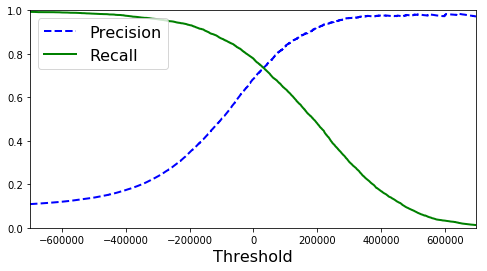

In [59]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [63]:
# 任意の閾値箇所のPrecision, Recallを調べる
# 例えば閾値６０００００のところ
y_train_pred_600000 = (y_scores > 600000)
print('Precision:', precision_score(y_train_5, y_train_pred_600000))
print('Recall:', recall_score(y_train_5, y_train_pred_600000))
# 閾値をあげることがPrecisionが上がり、Recallが下がったことがわかる

Precision: 0.978378378378
Recall: 0.0333886736764


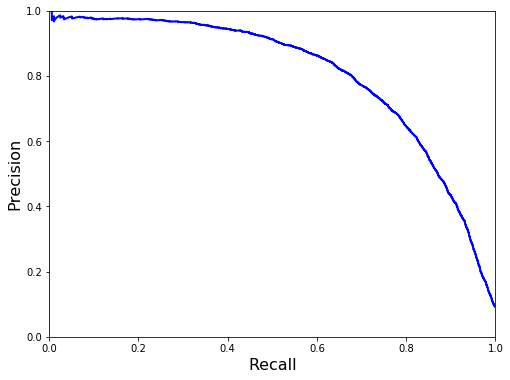

In [50]:
# PR-Curveを可視化する
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [64]:
# ROC Curves
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

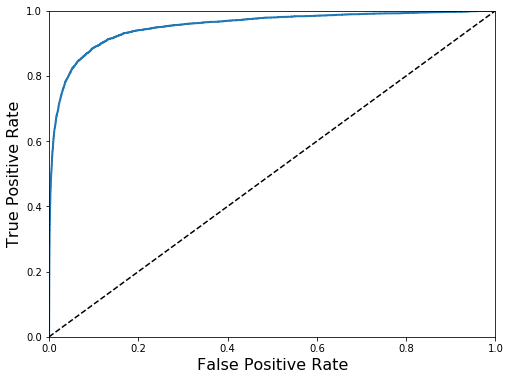

In [66]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [67]:
# random forestと比較してみる
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [69]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

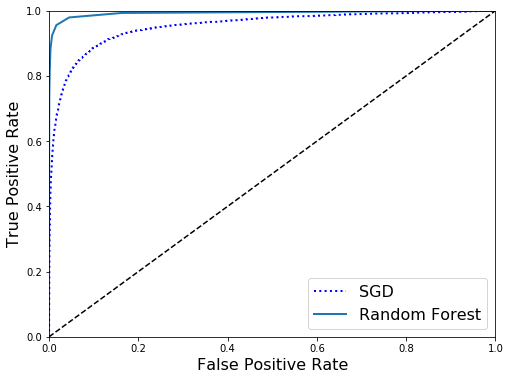

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()